In [2]:
import sys
!{sys.executable} -m pip install pokebase
!{sys.executable} -m pip install beautifulsoup4

You are using pip version 18.0, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import pokebase as pb
import pandas as pd

In [4]:
df = pd.read_csv('statsDF.csv')
df

,ID,Pokemon,Legendary,Stat Total,ATK Sum,DEF Sum,Height,Weight,Type1,Type2
0,1,bulbasaur,False,318,160,161,7,69,poison,grass
1,2,ivysaur,False,405,203,205,10,130,poison,grass
2,3,venusaur,False,525,263,265,20,1000,poison,grass
3,4,charmander,False,309,178,134,6,85,fire,NaN
4,5,charmeleon,False,405,225,183,11,190,fire,NaN
5,6,charizard,False,534,294,243,17,905,flying,fire
6,7,squirtle,False,314,142,175,5,90,water,NaN
7,8,wartortle,False,405,187,221,10,225,water,NaN
8,9,blastoise,False,530,247,286,16,855,water,NaN
9,10,caterpie,False,195,96,102,3,29,bug,NaN


In [5]:
df[['Height', 'Weight']].plot('Weight', 'Height', kind='scatter')

## Get list of legendary Pokemon

In [6]:
import requests
from bs4 import BeautifulSoup

# scrape list of legendary and mystical pokemon from bulbapedia
page = requests.get("https://bulbapedia.bulbagarden.net/wiki/Legendary_Pok%C3%A9mon")
soup = BeautifulSoup(page.content, 'html.parser')

# list of <a> tags of legendary pokemon
a_list = soup.select('td a[title*="(Pokémon)"]')

# extract text from <a> tags
legend_list = [lp.get_text() for lp in a_list]

# data cleaning: replace whitespace with hyphen, remove colon
legend_list = [p.lower().replace(' ', '-').replace(':', '') for p in legend_list]

# deoxys: deoxys-normal, deoxys-attack, deoxys-defense, deoxys-speed
try:
    legend_list.remove('deoxys')
    legend_list.extend(['deoxys-normal', 'deoxys-attack', 'deoxys-defense', 'deoxys-speed'])
except ValueError:
    print('Error')

# giratina: giratina-altered, giratina-origin
try:
    legend_list.remove('giratina')
    legend_list.extend(['giratina-altered', 'giratina-origin'])
except ValueError:
    print('Error')

# shaymin: shaymin-land, shaymin-sky
try:
    legend_list.remove('shaymin')
    legend_list.extend(['shaymin-land', 'shaymin-sky'])
except ValueError:
    print('Error')

# tornadus: tornadus-incarnate, tornadus-therian
try:
    legend_list.remove('tornadus')
    legend_list.extend(['tornadus-incarnate', 'tornadus-therian'])
except ValueError:
    print('Error')

# thundurus: thundurus-incarnate, thundurus-therian
try:
    legend_list.remove('thundurus')
    legend_list.extend(['thundurus-incarnate', 'thundurus-therian'])
except ValueError:
    print('Error')

# landorus: landorus-incarnate, landorus-therian
try:
    legend_list.remove('landorus')
    legend_list.extend(['landorus-incarnate', 'landorus-therian'])
except ValueError:
    print('Error')

# keldeo: keldeo-ordinary, keldeo-resolute
try:
    legend_list.remove('keldeo')
    legend_list.extend(['keldeo-ordinary', 'keldeo-resolute'])
except ValueError:
    print('Error')

# meloetta: meloetta-aria, meloetta-pirouette
try:
    legend_list.remove('meloetta')
    legend_list.extend(['meloetta-aria', 'meloetta-pirouette'])
except ValueError:
    print('Error')

# meltan: remove for now
try:
    legend_list.remove('meltan')
except ValueError:
    print('Error')

# melmetal: remove for now
try:
    legend_list.remove('melmetal')
except ValueError:
    print('Error')

## Non-legendaries (Weight vs. Height)

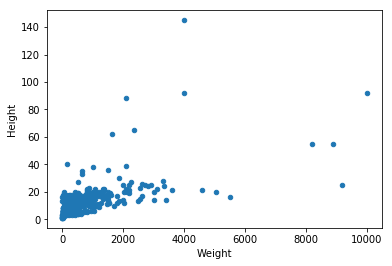

In [6]:
df[~df['Pokemon'].isin(legend_list)][['Height', 'Weight']].plot.scatter('Weight', 'Height')

## Legendaries (Weight vs. Height)

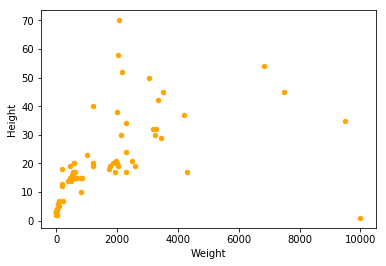

In [7]:
df[df['Pokemon'].isin(legend_list)][['Height', 'Weight']].plot.scatter('Weight', 'Height', c='orange')

## Combined (Weight vs. Height)

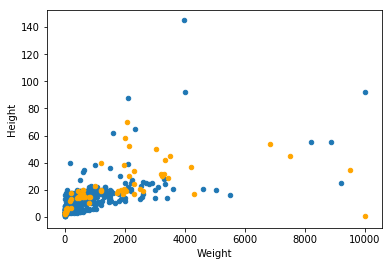

In [8]:
ax = df[~df['Pokemon'].isin(legend_list)][['Height', 'Weight']].plot('Weight', 'Height', kind='scatter')
df[df['Pokemon'].isin(legend_list)][['Height', 'Weight']].plot('Weight', 'Height', kind='scatter', c='orange', ax=ax)

## Means of Weight and Height

Legendary mean: maroon  
Regular mean: cyan

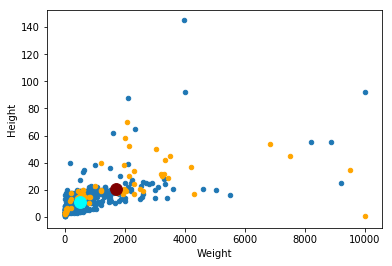

In [7]:
# legendary average height
l_h_mean = df[df['Pokemon'].isin(legend_list)]['Height'].mean()

# legendary average weight
l_w_mean = df[df['Pokemon'].isin(legend_list)]['Weight'].mean()

# regular average height
r_h_mean = df[~df['Pokemon'].isin(legend_list)]['Height'].mean()

# regular avaerage weight
r_w_mean = df[~df['Pokemon'].isin(legend_list)]['Weight'].mean()

# calculate means
df_l_mean = pd.DataFrame({"Weight":[l_w_mean], "Height":[l_h_mean]})
df_r_mean = pd.DataFrame({"Weight":[r_w_mean], "Height":[r_h_mean]})

# plot
ax = df[~df['Pokemon'].isin(legend_list)][['Height', 'Weight']].plot('Weight', 'Height', kind='scatter')
df[df['Pokemon'].isin(legend_list)][['Height', 'Weight']].plot('Weight', 'Height', kind='scatter', c='orange', ax=ax)
df_l_mean.plot.scatter('Weight', 'Height', c="maroon", s=140, ax = ax)
df_r_mean.plot.scatter('Weight', 'Height', c="cyan", s=140, ax = ax)


## Make a list of pokemon Types

In [10]:
import matplotlib.pyplot as plt

In [11]:
legendsDf = df[df['Pokemon'].isin(legend_list)]

legend_types = list(legendsDf['Type1']) + list(legendsDf['Type2'])
types = list(df['Type1']) + list(df['Type2'])

legendTypeCount = pd.Series(legend_types).value_counts().append(pd.Series([0],['poison']))
regularTypeCount = pd.Series(types).value_counts()

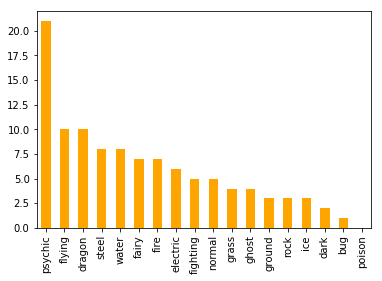

In [12]:
legendPlot = legendTypeCount.plot(kind='bar', title='Legendary Pokemon Typing', yticks=range(0,25,5), color="orange")
xstuff = legendPlot.set_xlabel("Typing")
ystuff = legendPlot.set_ylabel("Count")

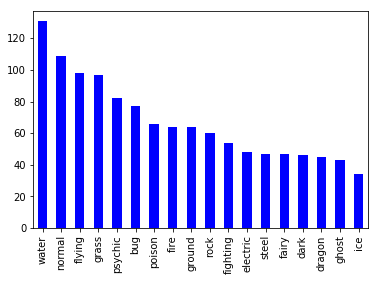

In [13]:
normalPlot = regularTypeCount.plot(kind='bar', title='All Pokemon Typing', yticks=range(0,150,10),  color="cyan")
xstuff = normalPlot.set_xlabel("Typing")
ystuff = normalPlot.set_ylabel("Count")

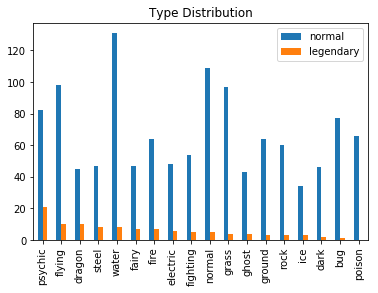

In [14]:
typeCompDf = legendTypeCount.to_frame()
typeCompDf = typeCompDf.merge(regularTypeCount.to_frame(), left_index=True, right_index=True)
typeCompDf.columns = ['Legendary','Normal']
typeCompDf=typeCompDf.reindex(columns=['Normal','Legendary'])


import matplotlib.pyplot as plt
overallPlot = typeCompDf.plot(kind='bar', title ="Type Distribution")
xstuff = overallPlot.set_xlabel("Typing")
ystuff = overallPlot.set_ylabel("Count")


plt.show()